<p style="color:blue; font-family:tahoma; font-size:100%">
<b>Author:</b>  Abhinav Dwivedi<br/>
<b>Python version:</b>  >3.6<br/>
<b>External Packages:</b> pandas, matplotlib, sklearn, numpy<br/>
<b>Last update:</b> 31st Jan 2018

<b>About this project:</b> This is an academic project, submitted as a part of semester credits in "Big Data analytics by Prof. <a href="http://kdd.isti.cnr.it/people/giannotti-fosca">Fosca Giannotti</a> and <a href="https://lucapappalardo.com"> Luca Pappalardo </a>" at Università di Pisa. 
</span></p>

<a id='top'></a>
# *Data modeling*
<p style="color:blue; font-family:tahoma; font-size:100%">
In this notebook, we utilize the data from the previous ones and model that data in order to predict the 'Outcome'. The modeling is done on dummy classifier as for benchmark. Then it is compared with knn and Random forest classifier. 
<br>
</p>

## Table of Contents



1.  [Dealing with imbalance in the data](#clean)
    1. [Merging/deleting attributes](#merge)
    2. [Subsampling (Optional)](#sample)
2. [Encoding and splitting the features](#encode)
3. [Classification](#classify)
    1. [Dummy Classifier / Benchmark](#dummy)
    2. [k nearest neighbors classifier](#knn)
    3. [Random forest classifier](#rf)
4. [Measuring performance of classifiers over test data](#predict)
    1. [Dummy classifier](#pdummy)
    2. [k nearest neighbors](#pknn)
    3. [Random forest classifier](#prf)

In [103]:
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
import seaborn as sn

<a id="clean"></a>
## 1. Dealing with imbalance in the data ([To top](#top))

In [2]:
data=pd.read_csv('dataToDelete/cleanedLondonStopAndSearch.csv')

In [3]:
data.head()

,Type,Age range,Officer-defined ethnicity,Object of search,Outcome
0,Person search,25-34,Asian,Stolen goods,Suspect arrested
1,Person search,25-34,Asian,Stolen goods,Suspect arrested
2,Person search,over 34,White,Stolen goods,Suspect arrested
3,Person and Vehicle search,25-34,White,Stolen goods,Suspect arrested
4,Person search,25-34,Asian,Controlled drugs,Nothing found - no further action


We plan to use 'Type', 'Age range', 'Ethnicity' and 'Object of search' as feature to predict the outcome. 

<a id="merge"></a>
### A. Merging/Deleting irrelavent features ([To top](#top))

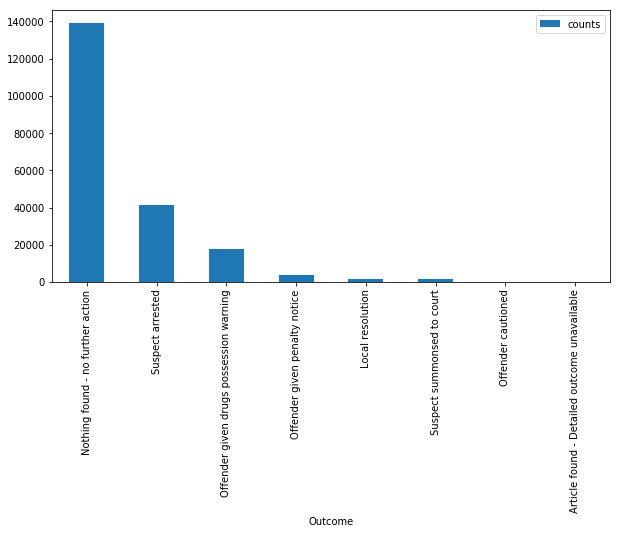

In [4]:
outcomes = data.groupby(['Outcome']).size().reset_index(name='counts').sort_values('counts',ascending=False)
outcomes.plot.bar(x='Outcome',figsize=(10,5), rot=90)
plt.show()

The Type, Age range, Ethnicity, and Object of search can be used to try to predict the outcome. 

We can also merge the Outcome into only two classes, where 'Nothing found = no further action' can be said as 'unsuccessful' investigation while the others can be said 'successful'. 

In [5]:
len_=len(data)
for idx, value in enumerate(data.Outcome):
    print("{}/{}".format(idx, len_), end="\r")
    if value=="Nothing found - no further action":
        data.Outcome[idx]="unsuccessful"
    else:
         data.Outcome[idx]="successful"

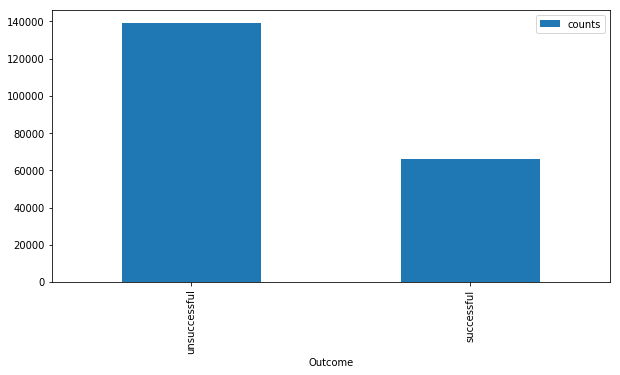

In [6]:
outcomes = data.groupby(['Outcome']).size().reset_index(name='counts').sort_values('counts',ascending=False)
outcomes.plot.bar(x='Outcome',figsize=(10,5), rot=90)
plt.show()

The balance in the labels now looks better than before but we can still subsample 'successful' a bit to minimize the difference. [Later]

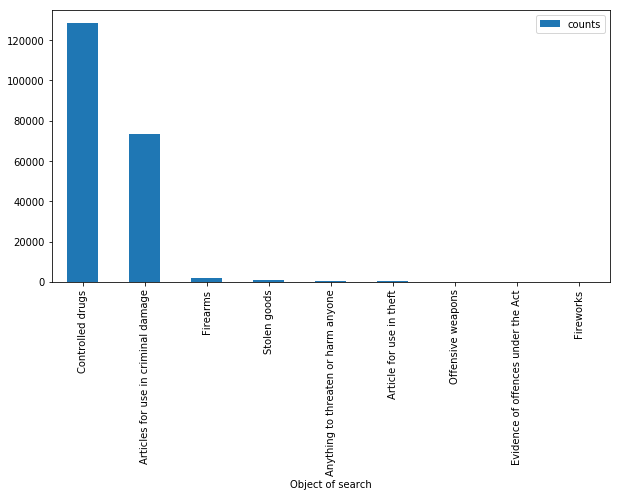

In [7]:
objects = data.groupby(['Object of search']).size().reset_index(name='counts').sort_values('counts',ascending=False)
objects.plot.bar(x='Object of search',figsize=(10,5), rot=90)
plt.show()

The investigations against controlled drugs are in majority. Hence, we can merge the other minority investigations to draw a conclusion on only two types of investigations, ie. Controlled drugs and the other types. 

In [8]:
for idx, value in enumerate(data['Object of search']):
    print("{}/{}".format(idx, len_), end="\r")
    if not value=="Controlled drugs":
        data['Object of search'][idx]="firearms/stolengoods/threatening/theft/fireworks/offence/weapons"

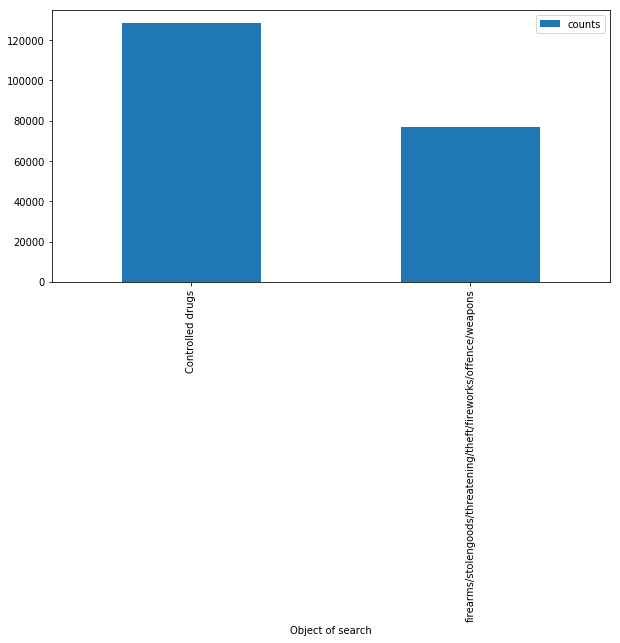

In [9]:
objects = data.groupby(['Object of search']).size().reset_index(name='counts').sort_values('counts',ascending=False)
objects.plot.bar(x='Object of search',figsize=(10,5), rot=90)
plt.show()

In [10]:
data.to_csv('dataToDelete/cleanedData.csv', index=None)

<a id="sample"></a>
### B. Subsampling the majority class (Optional)([To top](#top))

Now our data contains all the features categorical. These features needs to be encoded to numerical features. 

Before we encode data, we need to subsample the majority class a bit. We can simply take all the rows where Outcome is 'unsuccessful' and then select random number of rows according to our needs. 

In [11]:
data=pd.read_csv('dataToDelete/cleanedData.csv'):

In [12]:
tempData1=data[data['Outcome']!='successful']
tempData2=data[data['Outcome']!='unsuccessful']
tempData1=tempData1.sample(n=90000)
data=pd.concat([tempData1, tempData2], axis=0)
data = data.sample(frac=1).reset_index(drop=True)
tempData1=0
tempData2=0

In [13]:
data.head()

,Type,Age range,Officer-defined ethnicity,Object of search,Outcome
0,Person and Vehicle search,over 34,Black,firearms/stolengoods/threatening/theft/firewor...,successful
1,Person search,25-34,Black,firearms/stolengoods/threatening/theft/firewor...,successful
2,Person and Vehicle search,18-24,Black,firearms/stolengoods/threatening/theft/firewor...,unsuccessful
3,Person and Vehicle search,18-24,Black,Controlled drugs,unsuccessful
4,Person and Vehicle search,25-34,Black,Controlled drugs,successful


<a id="encode"></a>
## 2. Encoding and splitting features ([To top](#top))

In [55]:
data=pd.read_csv('dataToDelete/cleanedData.csv')

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
features=pd.get_dummies(data.drop(['Outcome'], axis=1))
labels=pd.get_dummies(data['Outcome'])

In [58]:
trainFeatures, testFeatures, trainLabels, testLabels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [59]:
print("#training Features : ", len(trainFeatures))
print("#test Features : ", len(testFeatures))
print("#training Labels : ", len(trainLabels))
print("#test Labels : ", len(testLabels))

#training Features :  154053
#test Features :  51351
#training Labels :  154053
#test Labels :  51351


<a id="classify"></a>
## 3. Classification and Validation([To top](#top))

<a id="dummy"></a>
### A. Dummy classifier - Benchmark ([To top](#top))

In [90]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score

In [61]:
dummyClassifier=DummyClassifier(random_state=0)
dummyClassifier.fit(trainFeatures, trainLabels)

DummyClassifier(constant=None, random_state=0, strategy='stratified')

In [62]:
dummyPredictions=dum.predict(testFeatures)

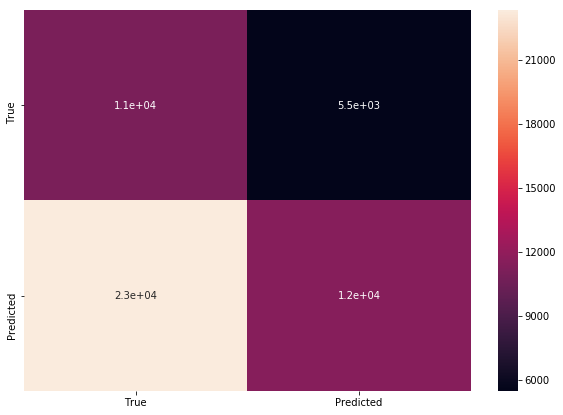

In [108]:
array=confusion_matrix(testLabels.values.argmax(axis=1), dummyPredictions.argmax(axis=1))
cm = pd.DataFrame(array, index = ["True", "Predicted"],
                  columns = ["True", "Predicted"])
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.show()
#argmax so that it doesn't throw ValueError multilabel-indicator is not supported

In [102]:
accuracy_score(testLabels, dummyPredictions)

0.28149403127495082

In [87]:
precision_score(testLabels, dummyPredictions,average='macro')

0.50054434726595032

In [91]:
recall_score(testLabels, dummyPredictions,average='macro')

0.49886234046132716

<a id="knn"></a>
### B. k-Nearest neighbors ([To top](#top))

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
knnClassifier = KNeighborsClassifier(leaf_size=20, metric='minkowski')
knnClassifier.fit(trainFeatures, trainLabels) 

KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [66]:
knnPredictions=knnClassifier.predict(testFeatures)

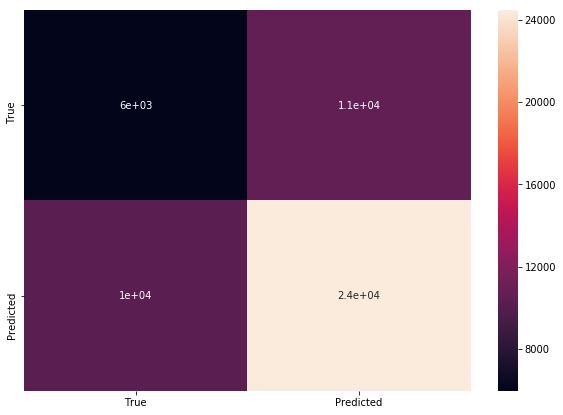

In [106]:
array=confusion_matrix(testLabels.values.argmax(axis=1), knnPredictions.argmax(axis=1))
cm = pd.DataFrame(array, index = ["True", "Predicted"],
                  columns = ["True", "Predicted"])
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.show()
#argmax so that it doesn't throw ValueError multilabel-indicator is not supported

In [67]:
accuracy_score(testLabels, knnPredictions)

0.59229615781581668

In [96]:
precision_score(testLabels, knnPredictions, average="weighted")

0.59079302588608307

In [97]:
recall_score(testLabels, knnPredictions, average="weighted")

0.59229615781581668

<a id="rf"></a>
### C. Random forest Classifier ([To top](#top))

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
rfClassifier = RandomForestClassifier(criterion='gini',n_jobs=40, random_state=0)
rfClassifier.fit(trainFeatures, trainLabels)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=40,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [77]:
predictions = rfClassifier.predict(testFeatures)

In [78]:
accuracy_score(testLabels, predictions)

0.67782516406691207

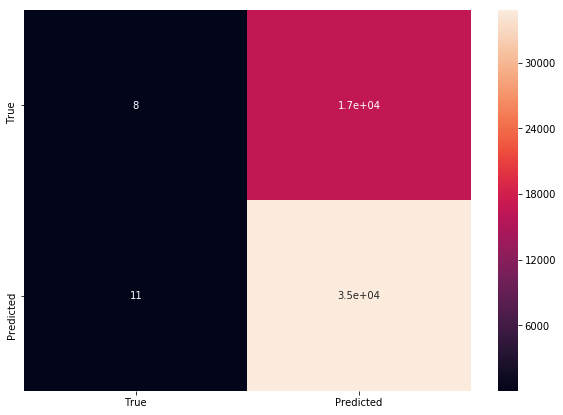

In [107]:
#argmax so that it doesn't throw ValueError multilabel-indicator is not supported
array=confusion_matrix(testLabels.values.argmax(axis=1), predictions.argmax(axis=1))
cm = pd.DataFrame(array, index = ["True", "Predicted"],
                  columns = ["True", "Predicted"])
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.show()

In [94]:
precision_score(testLabels, predictions,average='weighted')

0.5951789437410695

In [95]:
recall_score(testLabels, predictions,average='weighted')

0.67782516406691207